In [56]:
# importing libraries 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [57]:
# creating the data frame to read data 

df=pd.read_csv("bank.csv")


In [58]:
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [59]:
# lets check the structure of the data frame 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [60]:
# Let's check the number of rows and columns 

df.shape

(11162, 17)

In [61]:
# Let's find the basic statistics 

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [62]:
# Let's also look at the categorical values 

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [63]:
# Let's check for any missing values in the dataset 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [64]:
# As we an see, we have no missing values in the dataset 


In [65]:
# If we have any features with a single value, that would not have any impact on our predictive model 
# It is best to remove such features 

# Find unique values for every feature 


for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [66]:
# Let's explore the categorical features further 

categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [67]:
for feature in categorical_features:
    print("The feature is {} and number of categories are {}".format(feature,(df[feature].nunique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


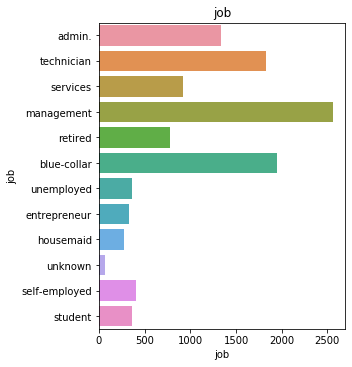

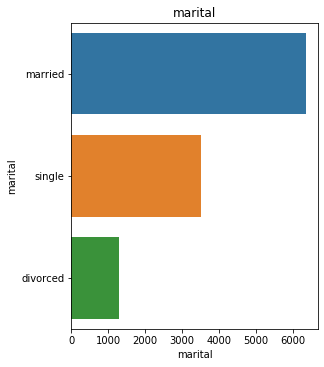

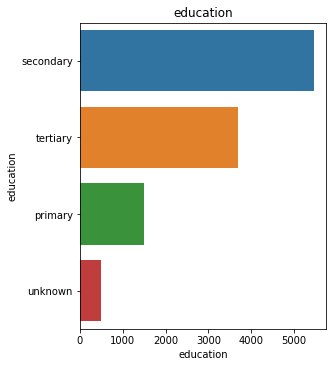

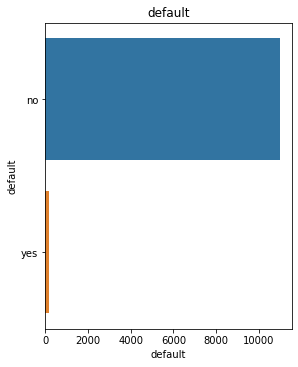

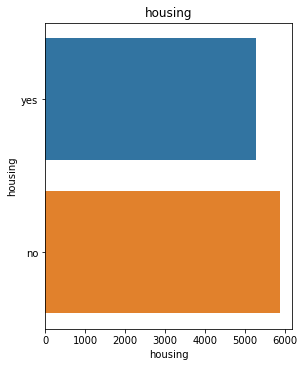

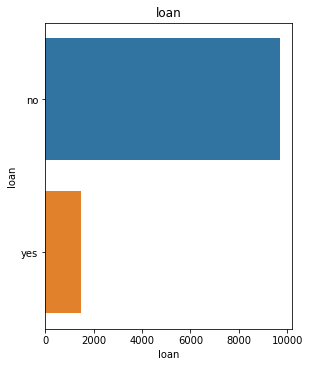

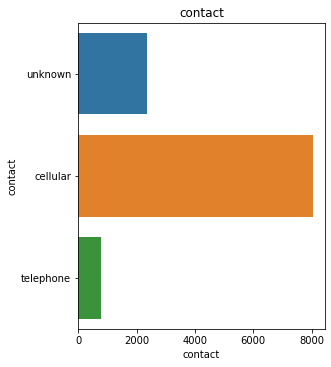

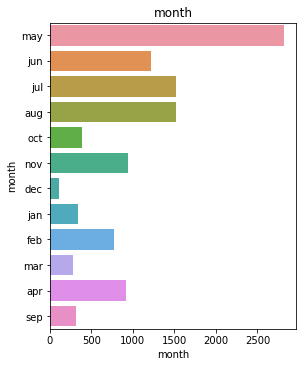

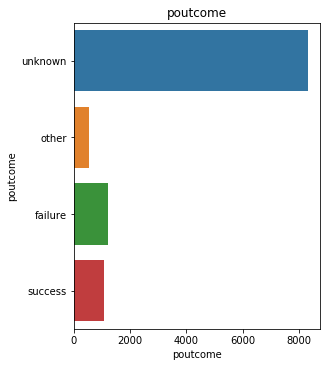

In [68]:
# We shall plot the categorical features for further understanding 


plotnumber=1
for categorical_feature in categorical_features:
    plt.figure(figsize=(15,80),facecolor="white")
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
    plt.show()

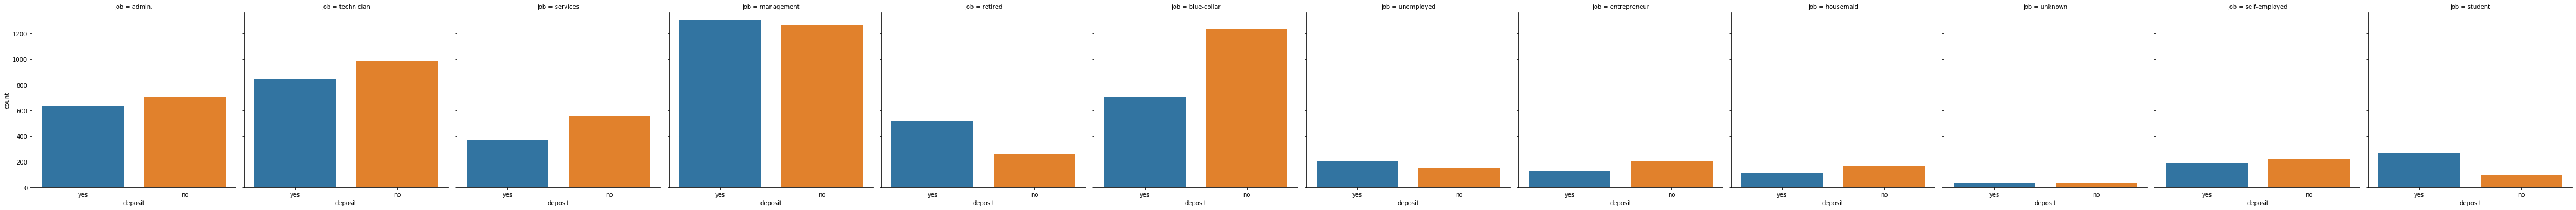

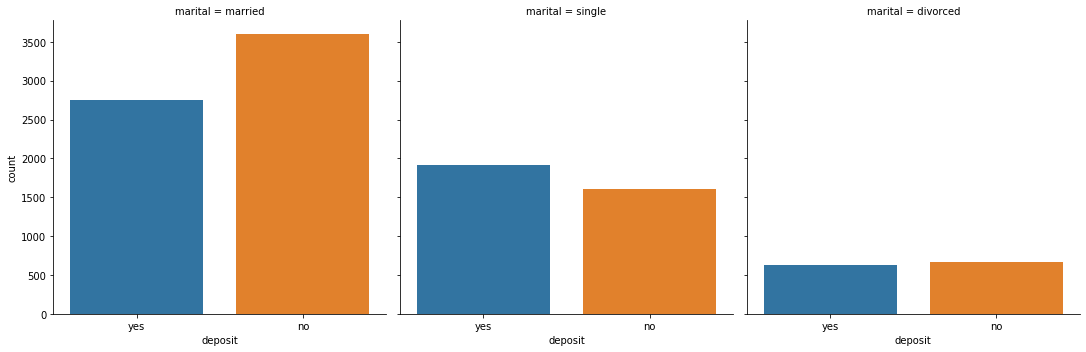

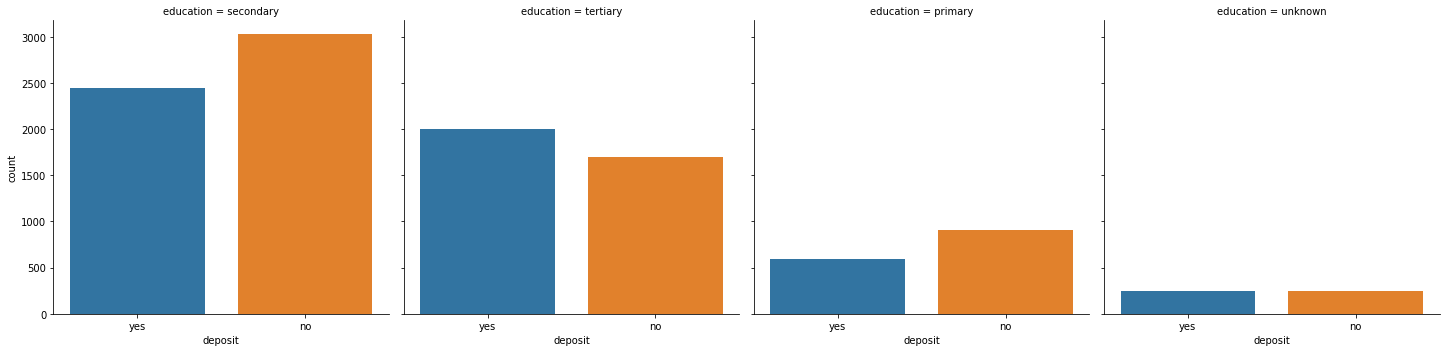

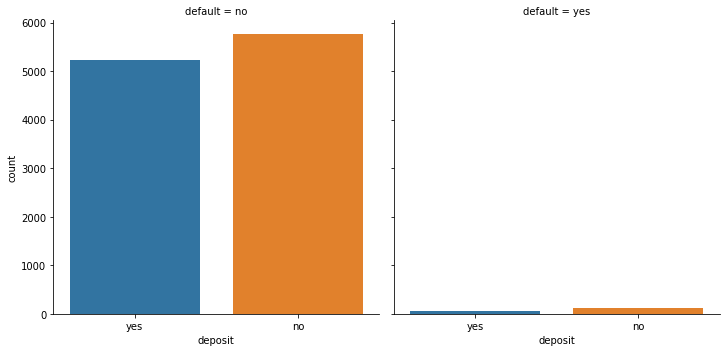

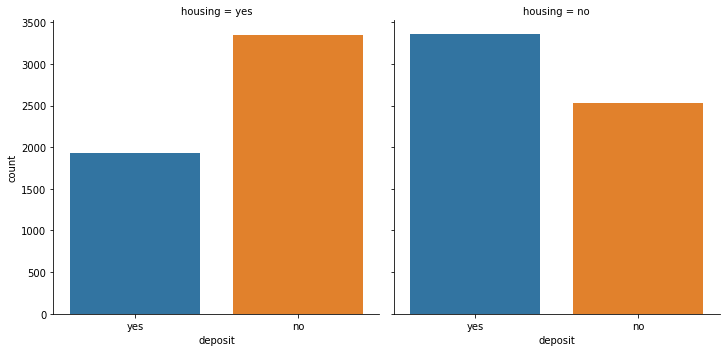

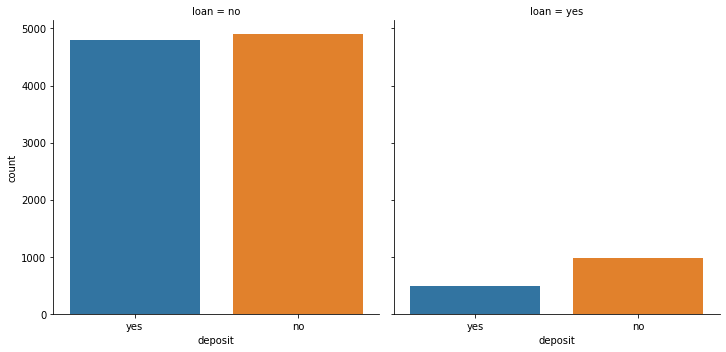

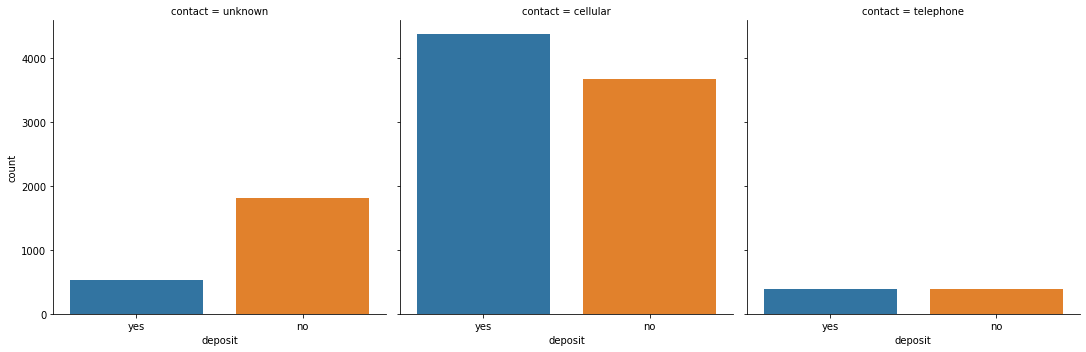

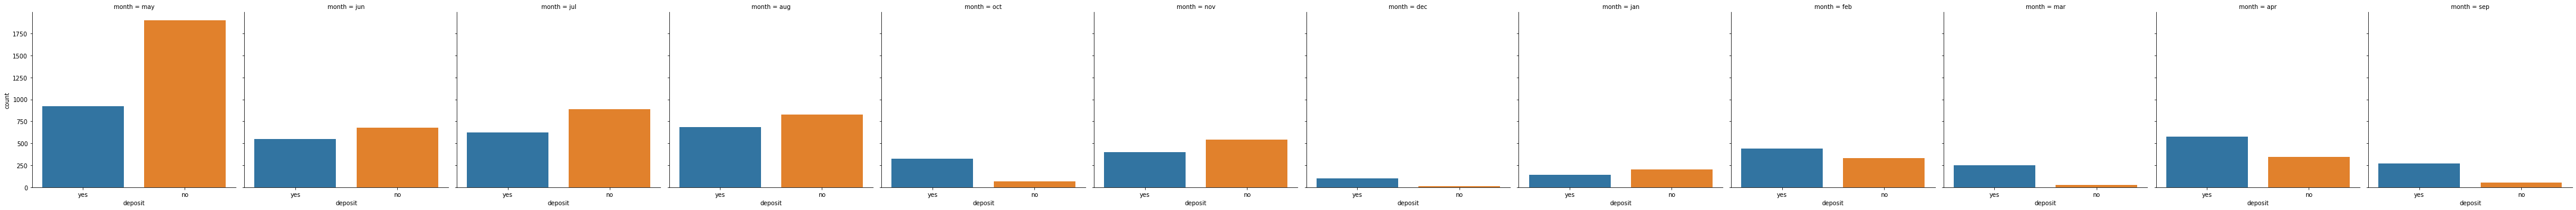

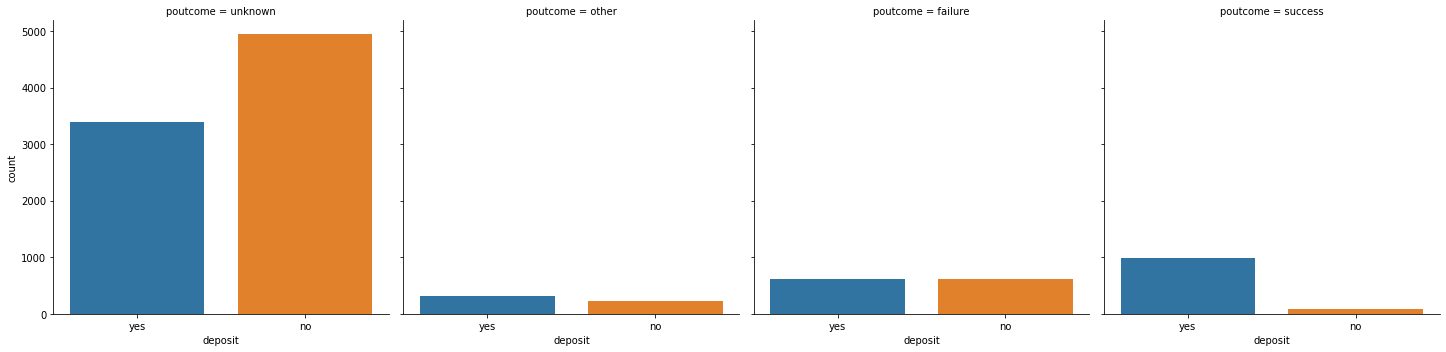

In [69]:
# Now we can move on to the relation betwen categorical variables and the dependent variable 

for categorical_feature in categorical_features:
    sns.catplot(x='deposit',col=categorical_feature,kind='count',data=df)
    plt.show()

In [70]:
# Observations 

# A retired client has higher acceptance for deposit 
# client with a housing loan is not interested in deposit 
# if pre-campaign result is a success, then client is interested in deposit 


In [71]:
# Let's now get the numerical features 

numerical_features =[feature for feature in df.columns if ((df[feature].dtypes !='O') & (feature not in ['deposit']))]
print('Number of numberical features:',len(numerical_features))

Number of numberical features: 7


In [72]:
df[numerical_features].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


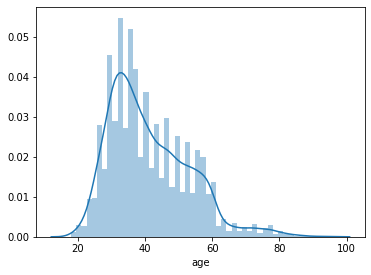

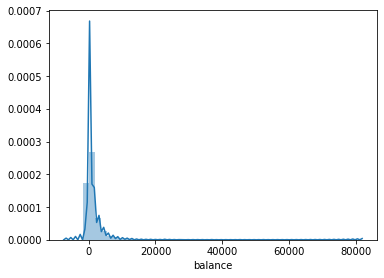

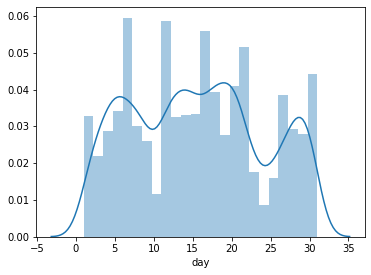

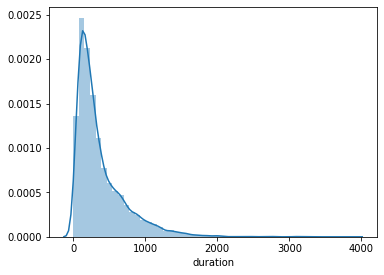

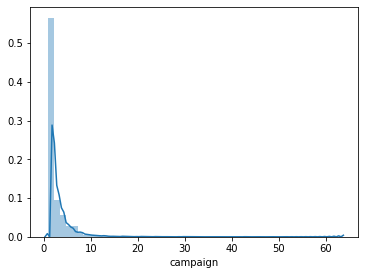

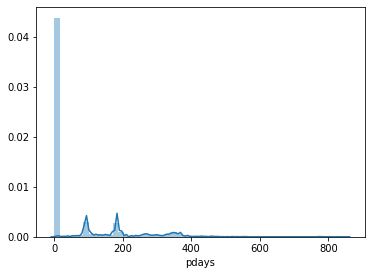

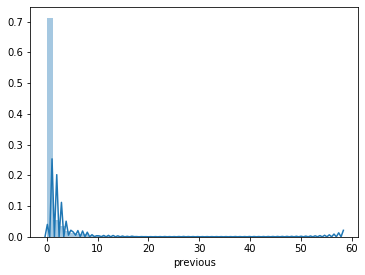

In [73]:
# Let's plot the continuous variables to explore the distribution 

plotnumber=1
for numerical_feature in numerical_features:
    plt.figure(figsize=(20,60),facecolor='white')
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
    plt.show()

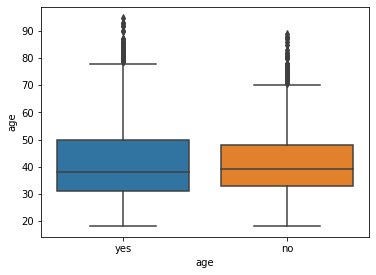

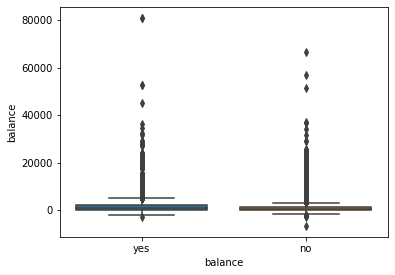

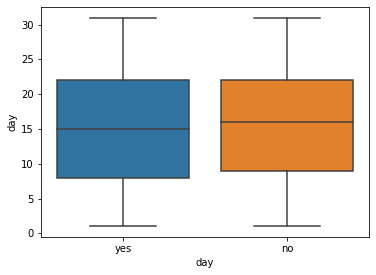

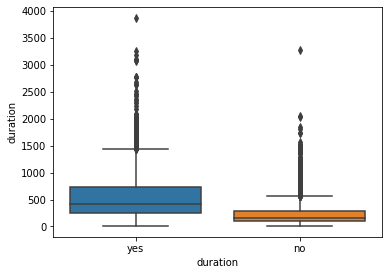

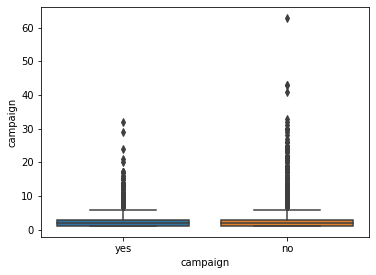

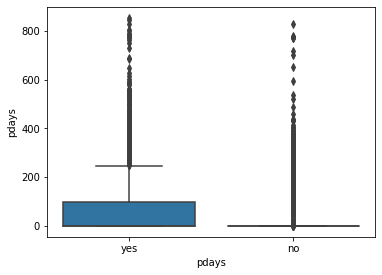

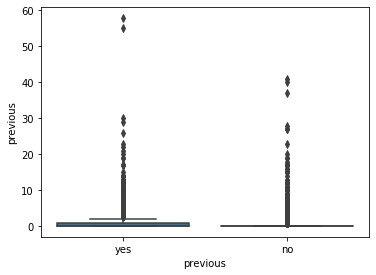

In [74]:
# Let's explore the relationship between continuous variables and dependent variable 

plonumber=1
for feature in numerical_features:
    plt.figure(figsize=(20,60),facecolor="White")
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit",y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber+=1
    plt.show()

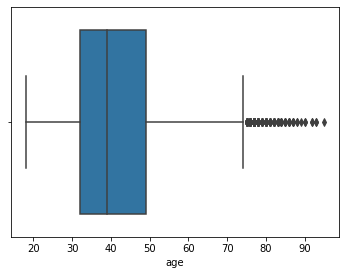

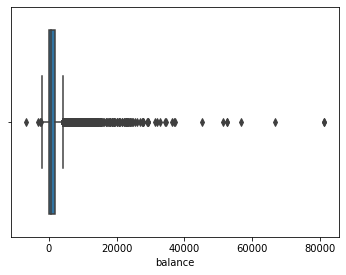

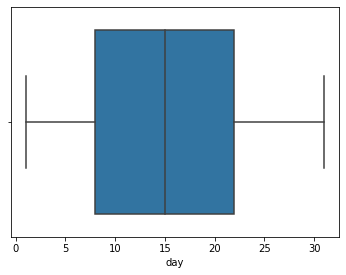

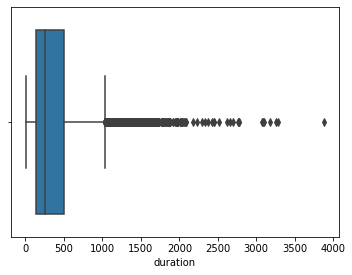

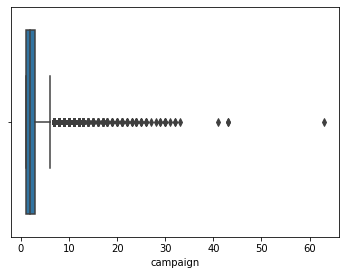

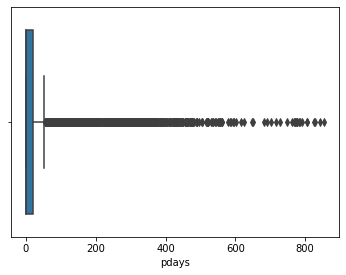

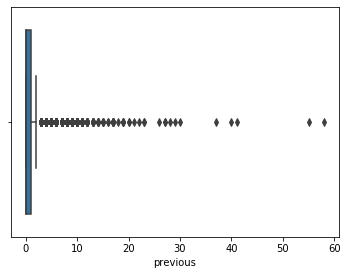

In [75]:
# Now we can look into the outliers in the dataset based on every numerical feature 

plotnumber=1
for numerical_feature in numerical_features:
    plt.figure(figsize=(20,60),facecolor="white")
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
    plt.show()

In [76]:
# Apart from days, all other features have some outliers that need to be taken care of 

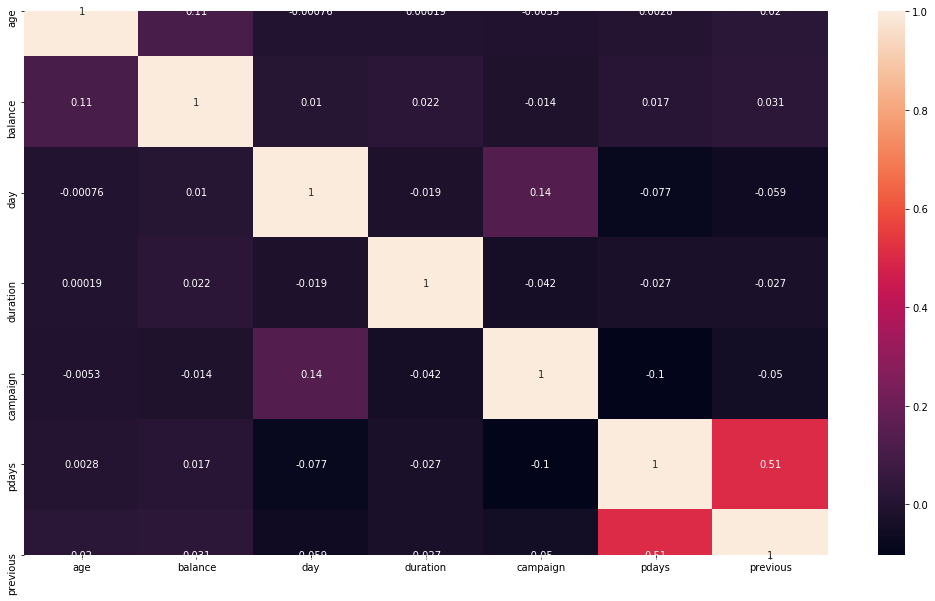

In [86]:
# Let's look at the correlation between numerical features 

cor_mat=df[numerical_features].corr()
fig= plt.figure(figsize=(18,10))
sns.heatmap(cor_mat,annot=True)

In [87]:
# There seems to be no heavy correlation in the numberical variables 

In [91]:
# Check if the dataset is balanced or not 
df['deposit'].groupby(df['deposit']).count()

deposit
no     5873
yes    5289
Name: deposit, dtype: int64

In [97]:
# there is only a slight difference. Seems to be balanced 

In [98]:
# Feature Engineering - Let's drop any unwanted features, handle missing values and remove outliers 


In [99]:
df2=df.copy()

In [100]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [101]:
df2.shape

(11162, 17)

In [104]:
# We saw from the above graphs that default feature does not play a very important role 
# let's look into it

df2.groupby(['deposit','default']).size()




deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

In [105]:
# as we can see out of 11162 rows, more than 10500 rows have default value no. Since this is more than 95%, we can remove this feature 

In [106]:
df2.drop(['default'],axis=1,inplace=True)

In [107]:
# Now let us look at the outliers

df2.groupby(['deposit','pdays']).size()



deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

In [108]:
# around 5000 rows for pdays have -1 value which does not make sense. Let us drop this feature as well. 

df2.drop(['pdays'],axis=1,inplace=True)

In [109]:
# Let's look at age 
df2.groupby(['deposit','age']).size()

deposit  age
no       18     1
         19     2
         20     5
         21     8
         22     8
               ..
yes      87     3
         90     2
         92     2
         93     2
         95     1
Length: 144, dtype: int64

In [110]:
# Let's look at balance 

df2.groupby(['deposit','balance']).size()

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Length: 5082, dtype: int64

In [111]:
# Duration 
df2.groupby(['deposit','duration']).size()

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Length: 2157, dtype: int64

In [112]:
# Camapign 
df2.groupby(['deposit','campaign']).size()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [113]:
# as we can see above the campaigns above 32 are very limited and can be treated as outliers 
# Let's remove these rows 

df3=df2[df2['campaign']<33]

In [114]:
df3.groupby(['deposit','campaign']).size()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [115]:
# Previous
df3.groupby(['deposit','previous']).size()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [144]:
# we can assume previous values obove 30 as outliers here 

df4=df3[df3['previous']<31]

In [145]:
df4.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,yes


In [117]:
# Categorical Variables 
# We have 2 sets of categorical values [yes/no and multiple categories]
# In order to include these into the model, we need to convert the values into numerical formats 


In [146]:
# Let's do it for multiple category features first using get_dummies
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [147]:
# Now let's do it for the boolean columns 
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [148]:
df4.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,59,2343,5,1042,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
1,56,45,5,1467,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,41,1270,5,1389,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,55,2476,5,579,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
4,54,184,5,673,2,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [149]:
# Now that we are done with feature engineering let's get down to building the model 

In [150]:
# Split data into training and test set 
X=df4.drop(['deposit_new'],axis=1)
y=df4['deposit_new']


In [151]:
# let's import the relevant models 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [152]:
len(X_train)

8921

In [153]:
len(X_test)

2231

In [154]:
# Model Selection 

In [157]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [158]:
# Let's start with a k-fold cross validation technique 
from sklearn.model_selection import cross_val_score 

In [159]:
# let's perform cross validation on RandomForestClassifier
model_score=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.85154062 0.84809417 0.84641256 0.85369955 0.85482063]
0.850913504415219


In [161]:
# Let's perform cross validation on XGB
model2_score=cross_val_score(estimator=XGBClassifier(),X=X_train,y=y_train,cv=5)
print(model2_score)
print(model2_score.mean())

[0.85266106 0.83912556 0.8323991  0.84248879 0.8559417 ]
0.8445232442752886


In [163]:
# To find out the best parameters, we will have to tune the hyperparameters
model_param= {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param': {
            'n_estimators':[10,30,40,50,100,140],
            'criterion':['gini','entropy'],
            'max_depth': range(2,4,1),
            'max_features':['auto','log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1,0.01,0.001],
            'max_depth':[3,5,10,20],
            'n_estimators':[10,50,100,150,200]
        }
    }
}

In [164]:
# GridSearch 
scores=[]
for model_name,mp in model_param.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model':model_name,
        'best_scores':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })

In [165]:
scores

[{'model': 'RandomForestClassifier',
  'best_scores': 0.7527040298444463,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_scores': 0.815825315117394,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}}]

In [166]:
# running the models above, we can see that XGBoost performs better
# We shall therefore go ahead and build the same 


model_xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=150)

In [167]:
model_xgb.fit(X_train,y_train)

XGBClassifier(max_depth=10, n_estimators=150)

In [168]:
model_xgb.score(X_test,y_test)

0.8547736441057822

In [174]:
# let us understand what is the importance of the different features involved 

headers=['name','score']
values= sorted(zip(X_train.columns,model_xgb.feature_importances_),key=lambda x:x[1]*-1)
xgb_features_importances=pd.DataFrame(values,columns=headers)

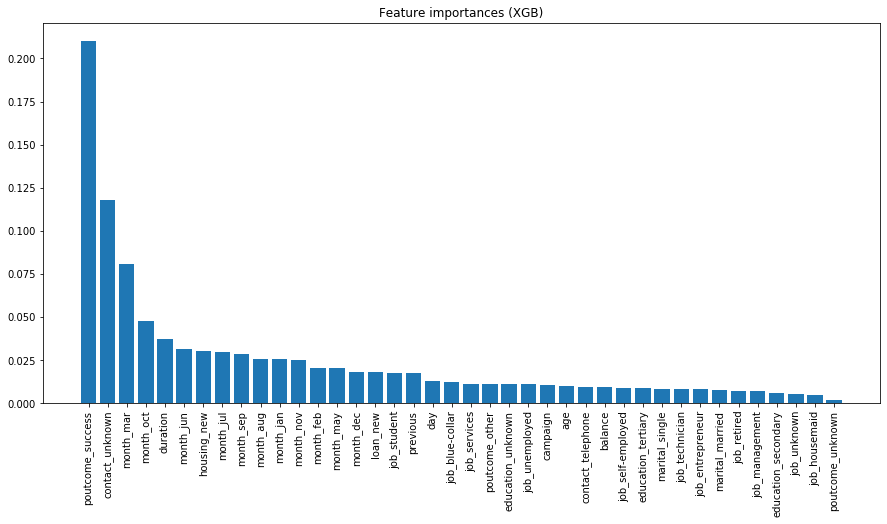

In [175]:
# Let's plot 
fig=plt.figure(figsize=(15,7))
x_pos=np.arange(0,len(xgb_features_importances))
plt.bar(x_pos,xgb_features_importances['score'])
plt.xticks(x_pos,xgb_features_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')
plt.show()

In [176]:
# let us finally run the confusion matrix to evaluate the model 

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[986, 193],
       [131, 921]], dtype=int64)

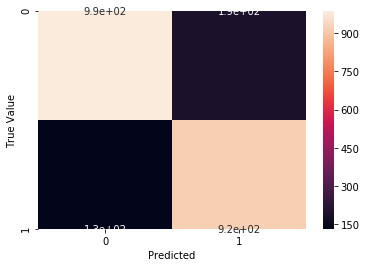

In [178]:
# let us plot the confusion matrix 

from matplotlib import pyplot as plt 
import seaborn as sn

sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()